This is a market analysis using data downloaded from the DVLA. The data includes the number of cars per Make/GenModel/Model/Fuel and shows LicenceStatus (Licensed/SORN) from 1994 Q4. However, from 1994 to 2008 it only shows data for Q4, whereas for all other years up to and including 2023 it shows all quarters. For 2024 it only shows Q1 & Q2.

The aim of the analysis is to examine the Electric vehicle adoption rates for Porsche in the last 5 years. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df = pd.read_csv('car_market_data.csv')
df.head()

,BodyType,Make,GenModel,Model,Fuel,LicenceStatus,2024Q2,2024Q1,2023Q4,2023Q3,...,2003Q4,2002Q4,2001Q4,2000Q4,1999Q4,1998Q4,1997Q4,1996Q4,1995Q4,1994Q4
0,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,Licensed,16,16,16,16,...,0,0,0,0,0,0,0,0,0,0
1,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR,Petrol,SORN,3,4,4,4,...,0,0,0,0,0,0,0,0,0,0
2,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,Licensed,24,25,25,26,...,0,0,0,0,0,0,0,0,0,0
3,Cars,ABARTH,ABARTH 124,124 GT MULTIAIR AUTO,Petrol,SORN,2,2,3,2,...,0,0,0,0,0,0,0,0,0,0
4,Cars,ABARTH,ABARTH SPIDER,124 SPIDER MULTIAIR,Petrol,Licensed,964,964,952,987,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_porsche = df[df["Make"] == "PORSCHE"]
df_porsche

,BodyType,Make,GenModel,Model,Fuel,LicenceStatus,2024Q2,2024Q1,2023Q4,2023Q3,...,2003Q4,2002Q4,2001Q4,2000Q4,1999Q4,1998Q4,1997Q4,1996Q4,1995Q4,1994Q4
153333,Cars,PORSCHE,PORSCHE 718,718 BOXSTER,Petrol,Licensed,278,265,263,265,...,0,0,0,0,0,0,0,0,0,0
153334,Cars,PORSCHE,PORSCHE 718,718 BOXSTER,Petrol,SORN,8,12,15,7,...,0,0,0,0,0,0,0,0,0,0
153335,Cars,PORSCHE,PORSCHE 718,718 BOXSTER 25 YEARS,Petrol,Licensed,35,34,31,36,...,0,0,0,0,0,0,0,0,0,0
153336,Cars,PORSCHE,PORSCHE 718,718 BOXSTER 25 YEARS,Petrol,SORN,5,6,8,4,...,0,0,0,0,0,0,0,0,0,0
153337,Cars,PORSCHE,PORSCHE 718,718 BOXSTER 25 YEARS S-A,Petrol,Licensed,57,54,49,58,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154396,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN TURBO S CROSS TURISMO,Battery electric,SORN,5,4,1,1,...,0,0,0,0,0,0,0,0,0,0
154397,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN TURBO S SPORT TURISMO,Battery electric,Licensed,152,147,136,88,...,0,0,0,0,0,0,0,0,0,0
154398,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN TURBO S SPORT TURISMO,Battery electric,SORN,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
154399,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN TURBO SPORT TURISMO,Battery electric,Licensed,163,160,142,111,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Merging PORSCHE GT with PORSCHE 911 as GT corresponds to GT3
df_porsche.loc[:, 'GenModel'] = df_porsche['GenModel'].replace("PORSCHE GT", "PORSCHE 911")

#Remove "PORSCHE MODEL MISSING"
df_porsche = df_porsche[~df_porsche['GenModel'].isin(["PORSCHE MODEL MISSING"])]

#Remove any columns that don't have "Cars" on the "BodyType" column
df_porsche = df_porsche[df_porsche['BodyType'] == "Cars"]

#Remove all SORN vehicles as they are not currently on the road
df_porsche = df_porsche[df_porsche['LicenceStatus'] == "Licensed"]

#Checking the number of unique values in the GenModel column to figure out which Porsche models are included in the df
model_counts = df_porsche['GenModel'].value_counts()
print(model_counts)

GenModel
PORSCHE 911         164
PORSCHE CAYENNE      67
PORSCHE PANAMERA     57
PORSCHE BOXSTER      40
PORSCHE 718          28
PORSCHE CAYMAN       21
PORSCHE CARRERA      17
PORSCHE 968          17
PORSCHE TAYCAN       17
PORSCHE 944          16
PORSCHE 928          16
PORSCHE 924          10
PORSCHE MACAN        10
PORSCHE 918           2
Name: count, dtype: int64


In [5]:
hard_columns = ["BodyType", "Make", "GenModel", "Model", "Fuel", "LicenceStatus"]
df_filtered = df_porsche.loc[:, df_porsche.columns.str.contains(r'^(2019Q[1-4]|20[2-4]\dQ[1-4])', regex=True) | df_porsche.columns.isin(hard_columns)]
df_filtered.head()

C:\Users\Michalis\AppData\Local\Temp\ipykernel_3172\354276483.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df_porsche.loc[:, df_porsche.columns.str.contains(r'^(2019Q[1-4]|20[2-4]\dQ[1-4])', regex=True) | df_porsche.columns.isin(hard_columns)]


,BodyType,Make,GenModel,Model,Fuel,LicenceStatus,2024Q2,2024Q1,2023Q4,2023Q3,...,2021Q2,2021Q1,2020Q4,2020Q3,2020Q2,2020Q1,2019Q4,2019Q3,2019Q2,2019Q1
153333,Cars,PORSCHE,PORSCHE 718,718 BOXSTER,Petrol,Licensed,278,265,263,265,...,225,221,224,229,223,219,216,211,204,202
153335,Cars,PORSCHE,PORSCHE 718,718 BOXSTER 25 YEARS,Petrol,Licensed,35,34,31,36,...,0,0,0,0,0,0,0,0,0,0
153337,Cars,PORSCHE,PORSCHE 718,718 BOXSTER 25 YEARS S-A,Petrol,Licensed,57,54,49,58,...,4,0,0,0,0,0,0,0,0,0
153339,Cars,PORSCHE,PORSCHE 718,718 BOXSTER GTS,Petrol,Licensed,266,261,238,223,...,125,131,111,71,30,27,25,21,19,16
153341,Cars,PORSCHE,PORSCHE 718,718 BOXSTER GTS S-A,Petrol,Licensed,897,873,799,762,...,503,479,457,464,441,416,402,367,336,277


In [6]:
#I now want to combine the quarters for each year into one column as this analysis does not take into consideration the individual quarter numbers
porsche_data = pd.DataFrame()

# Select only the Q2 columns from each year
q2_columns = {f"{year}Q2": str(year) for year in range(2019, 2025) if f"{year}Q2" in df_filtered.columns}

# Rename the Q2 columns to just the year (e.g., 2019Q2 → 2019)
porsche_data = df_filtered[list(q2_columns.keys())].rename(columns=q2_columns)

# Concatenate with the hard columns to keep them in the dataset
porsche_data = pd.concat([df_filtered[hard_columns], porsche_data], axis=1)

# Display the first few rows
porsche_data.head()

,BodyType,Make,GenModel,Model,Fuel,LicenceStatus,2019,2020,2021,2022,2023,2024
153333,Cars,PORSCHE,PORSCHE 718,718 BOXSTER,Petrol,Licensed,204,223,225,248,269,278
153335,Cars,PORSCHE,PORSCHE 718,718 BOXSTER 25 YEARS,Petrol,Licensed,0,0,0,34,36,35
153337,Cars,PORSCHE,PORSCHE 718,718 BOXSTER 25 YEARS S-A,Petrol,Licensed,0,0,4,62,59,57
153339,Cars,PORSCHE,PORSCHE 718,718 BOXSTER GTS,Petrol,Licensed,19,30,125,170,219,266
153341,Cars,PORSCHE,PORSCHE 718,718 BOXSTER GTS S-A,Petrol,Licensed,336,441,503,594,730,897


In [7]:
#Clearing up the fuel types
#Removing rows with fuel types "Fuel cell electric" and "Other fuel types"
porsche_data.head()

porsche_data_fuels = porsche_data['Fuel'].unique()
#print(porsche_data_fuels)

#Cleaning the fuel data - removing fuel types that do not make sense to exist
porsche_data_cleaned = porsche_data[~porsche_data['Fuel'].isin(["Fuel cell electric"])]

#Now I will be replacing all the "Gas" fuels with "Petrol"
porsche_data_cleaned.loc[:, 'Fuel'] = porsche_data_cleaned['Fuel'].replace("Gas", "Petrol")
porsche_data_cleaned.loc[:, 'Fuel'] = porsche_data_cleaned['Fuel'].replace("Hybrid electric (petrol)", "Plug-in hybrid electric (petrol)")
porsche_data_cleaned.loc[:, 'Fuel'] = porsche_data_cleaned['Fuel'].replace("Plug-in hybrid electric (petrol)", "Plug-in hybrid electric")


print(porsche_data_cleaned['Fuel'].unique())
porsche_data_cleaned


['Petrol' 'Diesel' 'Battery electric' 'Plug-in hybrid electric']


,BodyType,Make,GenModel,Model,Fuel,LicenceStatus,2019,2020,2021,2022,2023,2024
153333,Cars,PORSCHE,PORSCHE 718,718 BOXSTER,Petrol,Licensed,204,223,225,248,269,278
153335,Cars,PORSCHE,PORSCHE 718,718 BOXSTER 25 YEARS,Petrol,Licensed,0,0,0,34,36,35
153337,Cars,PORSCHE,PORSCHE 718,718 BOXSTER 25 YEARS S-A,Petrol,Licensed,0,0,4,62,59,57
153339,Cars,PORSCHE,PORSCHE 718,718 BOXSTER GTS,Petrol,Licensed,19,30,125,170,219,266
153341,Cars,PORSCHE,PORSCHE 718,718 BOXSTER GTS S-A,Petrol,Licensed,336,441,503,594,730,897
...,...,...,...,...,...,...,...,...,...,...,...,...
154392,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN TURBO GT,Battery electric,Licensed,0,0,0,0,0,2
154393,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN TURBO S,Battery electric,Licensed,0,35,585,763,962,1152
154395,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN TURBO S CROSS TURISMO,Battery electric,Licensed,0,0,1,97,199,252
154397,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN TURBO S SPORT TURISMO,Battery electric,Licensed,0,0,0,17,66,152


In [8]:
#Now I want to combine the rows with the same GenModel
hard_columns_1 = ['BodyType', "Make", "GenModel", "Fuel", "LicenceStatus"]
fuel_types = porsche_data['Fuel'].unique()
print(fuel_types)
fuel_cell_electric = porsche_data[porsche_data['Fuel'] == 'Battery electric']
fuel_cell_electric

['Petrol' 'Diesel' 'Battery electric' 'Gas' 'Fuel cell electric'
 'Plug-in hybrid electric (petrol)' 'Hybrid electric (petrol)']


,BodyType,Make,GenModel,Model,Fuel,LicenceStatus,2019,2020,2021,2022,2023,2024
153389,Cars,PORSCHE,PORSCHE 911,911,Battery electric,Licensed,1,1,1,3,2,3
153427,Cars,PORSCHE,PORSCHE 911,911 CARRERA 2 CABRIO,Battery electric,Licensed,0,0,0,0,1,1
153433,Cars,PORSCHE,PORSCHE 911,911 CARRERA 2 COUPE,Battery electric,Licensed,0,0,0,0,1,0
153443,Cars,PORSCHE,PORSCHE 911,911 CARRERA 2 COUPE A,Battery electric,Licensed,0,0,0,0,1,2
153825,Cars,PORSCHE,PORSCHE 944,944 S2,Battery electric,Licensed,0,0,0,1,1,1
153879,Cars,PORSCHE,PORSCHE BOXSTER,BOXSTER,Battery electric,Licensed,0,0,2,1,1,1
154369,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN 4 CROSS TURISMO,Battery electric,Licensed,0,0,0,476,782,1059
154371,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN 4S,Battery electric,Licensed,0,0,0,0,0,116
154372,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN 4S 79KWH,Battery electric,Licensed,0,43,578,888,1000,1082
154374,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN 4S 93KWH,Battery electric,Licensed,0,136,2060,2870,3758,4253


In [9]:
#Cleaning up the Battery electric cars because some of them are not Taycans (error)
porsche_data_cleaned = porsche_data_cleaned[
    (porsche_data_cleaned['Fuel'] != "Battery electric") | 
    (porsche_data_cleaned['GenModel'] == "PORSCHE TAYCAN")
]
fuel_cell_electric_1 = porsche_data_cleaned[porsche_data_cleaned['Fuel'] == 'Battery electric']
fuel_cell_electric_1

,BodyType,Make,GenModel,Model,Fuel,LicenceStatus,2019,2020,2021,2022,2023,2024
154369,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN 4 CROSS TURISMO,Battery electric,Licensed,0,0,0,476,782,1059
154371,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN 4S,Battery electric,Licensed,0,0,0,0,0,116
154372,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN 4S 79KWH,Battery electric,Licensed,0,43,578,888,1000,1082
154374,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN 4S 93KWH,Battery electric,Licensed,0,136,2060,2870,3758,4253
154376,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN 4S CROSS TURISMO,Battery electric,Licensed,0,0,15,928,1741,2568
154378,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN 4S SPORT TURISMO,Battery electric,Licensed,0,0,0,80,559,1031
154380,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN 4X2,Battery electric,Licensed,0,0,570,1475,2251,2828
154382,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN GTS,Battery electric,Licensed,0,0,0,107,519,1149
154384,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN GTS SPORT TURISMO,Battery electric,Licensed,0,0,0,43,357,1021
154386,Cars,PORSCHE,PORSCHE TAYCAN,TAYCAN SPORT TURISMO 4X2,Battery electric,Licensed,0,0,0,60,430,724


In [10]:
#Dropping columns that are currently not necessary but storing them in case I need them later
# Store the dropped columns separately
hidden_columns = porsche_data_cleaned[['BodyType', 'Make', 'Model']].copy()

# Drop the columns from the main DataFrame
porsche_data_cleaned = porsche_data_cleaned.drop(columns=['BodyType', 'Make', 'Model', 'GenModel', 'LicenceStatus'])
porsche_data_cleaned.head()

,Fuel,2019,2020,2021,2022,2023,2024
153333,Petrol,204,223,225,248,269,278
153335,Petrol,0,0,0,34,36,35
153337,Petrol,0,0,4,62,59,57
153339,Petrol,19,30,125,170,219,266
153341,Petrol,336,441,503,594,730,897


In [11]:
#Now I want to create a new DF where I will sum [up the number of cars on the road based on their fuel type
#fuel_groups = porsche_data_cleaned.drop(columns=['GenModel', 'LicenceStatus'])
fuel_groups = porsche_data_cleaned.groupby('Fuel').sum().reset_index()
#fuel_groups = fuel_groups.drop(columns=['GenModel', 'LicenceStatus'])
fuel_groups

,Fuel,2019,2020,2021,2022,2023,2024
0,Battery electric,0,258,4688,9121,14336,19413
1,Diesel,24276,23624,23367,23102,22799,22375
2,Petrol,121831,123641,133587,140117,149528,157162
3,Plug-in hybrid electric,3591,5448,6611,7649,9813,12107


In [12]:
#Calculate the percentage change for each fuel type
percentage_change = fuel_groups.set_index('Fuel').pct_change(axis=1) * 100
percentage_change = percentage_change.reset_index()
percentage_change

,Fuel,2019,2020,2021,2022,2023,2024
0,Battery electric,NaN,inf,1717.054264,94.560580,57.175748,35.414342
1,Diesel,NaN,-2.685780,-1.087877,-1.134078,-1.311575,-1.859731
2,Petrol,NaN,1.485665,8.044257,4.888200,6.716530,5.105398
3,Plug-in hybrid electric,NaN,51.712615,21.347283,15.701104,28.291280,23.377153


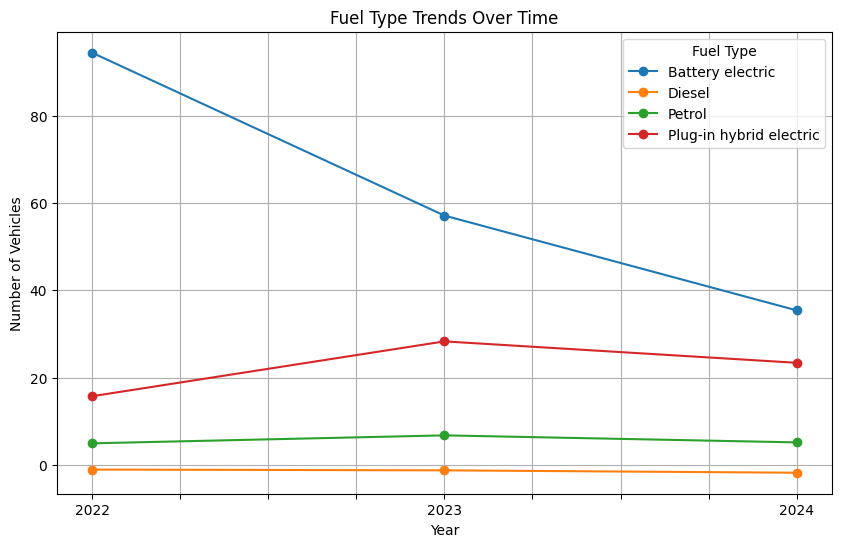

In [20]:
import matplotlib.pyplot as plt

percentage_change_filtered = percentage_change[["Fuel", "2022", "2023", "2024"]]

# Transpose for better plotting
df_plot = percentage_change_filtered.set_index("Fuel").T

# Plot trend over time
df_plot.plot(kind='line', marker='o', figsize=(10, 6))

plt.title("Fuel Type Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Vehicles")
plt.legend(title="Fuel Type")
plt.grid(True)
plt.show()


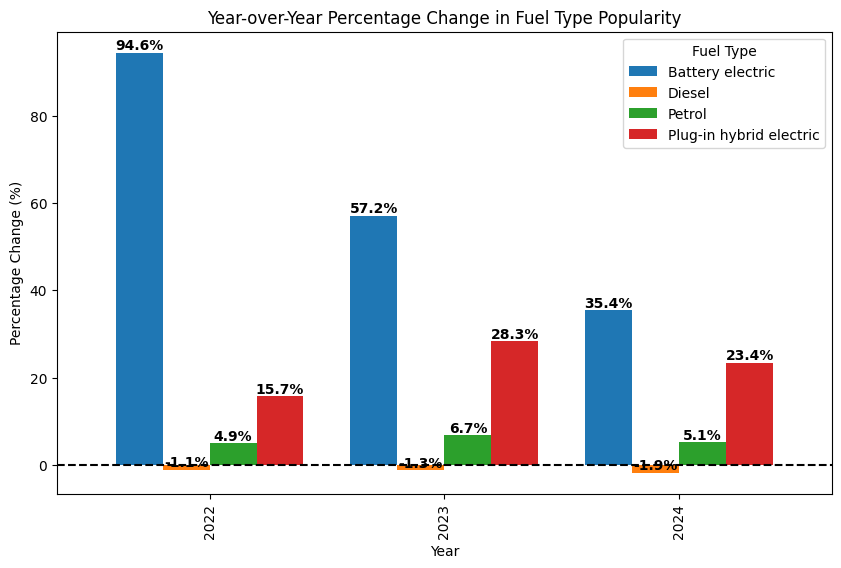

: 

In [ ]:
# Transpose for better visualization
df_pct_plot = percentage_change_filtered.set_index("Fuel").T

# Plot percentage change
ax = df_pct_plot.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title("Year-over-Year Percentage Change in Fuel Type Popularity")
plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.axhline(0, color='black', linestyle='dashed')  # Reference line at 0%
plt.legend(title="Fuel Type")
#plt.grid(axis='y', linestyle='dashed')

# Add percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Avoid placing labels on bars with 0 value
        ax.annotate(f"{height:.1f}%", 
                    (p.get_x() + p.get_width() / 2, height), 
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
        
plt.show()
